# Multi-Class Prediction

## Import the Libraries

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Gathering Data

*Load the train data table*

In [28]:
TRAIN_DT = pd.read_csv('csv/bmi_train.csv')
TRAIN_DT.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


*Load the validation data table*

In [29]:
VALIDATION_DT = pd.read_csv('csv/bmi_validation.csv')
VALIDATION_DT.head()

,Gender,Height,Weight
0,Male,161,103
1,Male,180,75
2,Male,174,95
3,Female,179,103
4,Female,192,140


## Assessing Data

In [30]:
TRAIN_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [31]:
VALIDATION_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  100 non-null    object
 1   Height  100 non-null    int64 
 2   Weight  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


*Looking for empty or null data/cell in dataset*

In [32]:
TRAIN_DT.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [33]:
VALIDATION_DT.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

*Looking for duplicated data in dataset*

In [34]:
TRAIN_DT.duplicated().sum()

8

In [35]:
VALIDATION_DT.duplicated().sum()

0

## Preprocessing and Cleaning the Data

*Making copy of datasets and drop all the duplicates data in train dataset*

In [36]:
train_dt_c = TRAIN_DT.copy()
train_dt_c.drop_duplicates(inplace=True)

valid_dt_c = VALIDATION_DT.copy()

*Using map function to encoding the gender feature with numerical type, 0 for male and 1 for female*

In [37]:
train_dt_c['Gender'] = train_dt_c['Gender'].map({'Male': 0, 'Female': 1})
valid_dt_c['Gender'] = valid_dt_c['Gender'].map({'Male': 0, 'Female': 1})

*Using StandardScaler function from sklearn to feature scalling the height and weight*

In [38]:
# Apply feature scaling to weight and height
scaler = StandardScaler()
scaler.fit(train_dt_c[['Weight', 'Height']])  # Fit only on training data

# Transform both training and validation data
train_dt_c[['Weight', 'Height']] = scaler.transform(train_dt_c[['Weight', 'Height']])
valid_dt_c[['Weight', 'Height']] = scaler.transform(valid_dt_c[['Weight', 'Height']])

*Separate the features and label for train dataset*

In [39]:
X = train_dt_c.drop('Index', axis=1)
Y = train_dt_c['Index']

*Split the data into 70% Train, 15% Valid and 15% Test*

In [40]:
# Split the dataset into training and temp (validation + test)
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Split the temp dataset into validation and test sets
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

*Augmented the data*

In [41]:
x_train_augmented, y_train_augmented = resample(
    x_train, y_train, 
    n_samples=len(x_train),
    replace=True
)


In [71]:
# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Store the results for each fold
fold_accuracies = []

for train_index, val_index in kf.split(x_train_augmented):
    # Split the data into training and validation sets for this fold using .iloc
    x_train_fold, x_val_fold = x_train_augmented.iloc[train_index], x_train_augmented.iloc[val_index]
    y_train_fold, y_val_fold = y_train_augmented.iloc[train_index], y_train_augmented.iloc[val_index]

In [42]:
x_train.head()

,Gender,Height,Weight
110,0,-1.044882,-1.115680
17,0,-0.321750,1.502240
324,1,0.401381,-1.392872
24,1,-1.044882,-0.869288
128,0,-1.225665,-0.992484


In [43]:
y_train.head()

110    3
17     5
324    2
24     2
128    4
Name: Index, dtype: int64

## Exploring the data

In [44]:
x_train.describe(include="all")

,Gender,Height,Weight
count,274.000000,274.000000,274.000000
mean,0.496350,-0.053875,0.015792
std,0.500902,0.979788,0.993913
min,0.000000,-1.828274,-1.731662
25%,0.000000,-0.864099,-0.799990
50%,0.000000,-0.080707,0.039285
75%,1.000000,0.762947,0.978656
max,1.000000,1.666861,1.656235


In [45]:
y_train.describe(include="all")

count    274.000000
mean       3.788321
std        1.322838
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64

In [46]:
valid_dt_c.describe(include="all")

,Gender,Height,Weight
count,100.00,100.000000,100.000000
mean,0.55,-0.124697,-0.014306
std,0.50,0.935359,1.004856
min,0.00,-1.768013,-1.700863
25%,0.00,-0.864099,-0.915486
50%,1.00,-0.140968,-0.083912
75%,1.00,0.597229,0.893959
max,1.00,1.606600,1.656235


In [47]:
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

print ('\nThe shape of validation dataset is: ' + str(valid_dt_c.shape))
print ('We have m = %d validation examples' % (len(valid_dt_c)))

The shape of X_train is: (274, 3)
The shape of y_train is: (274,)
We have m = 274 training examples

The shape of validation dataset is: (100, 3)
We have m = 100 validation examples


## Visualize the Data

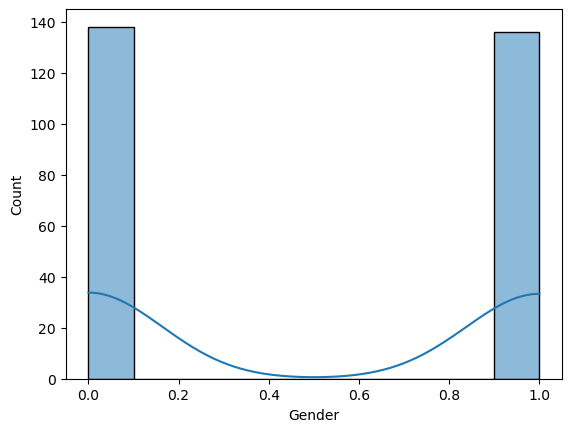

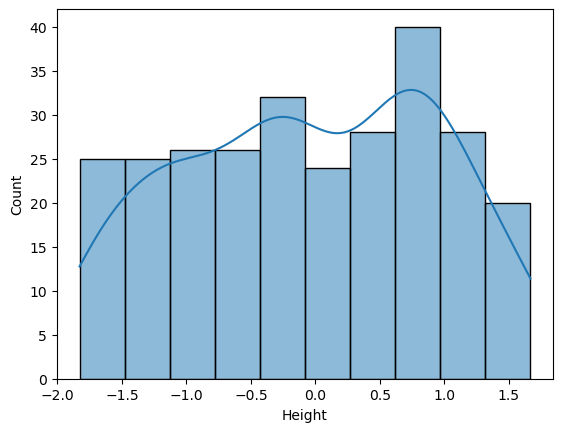

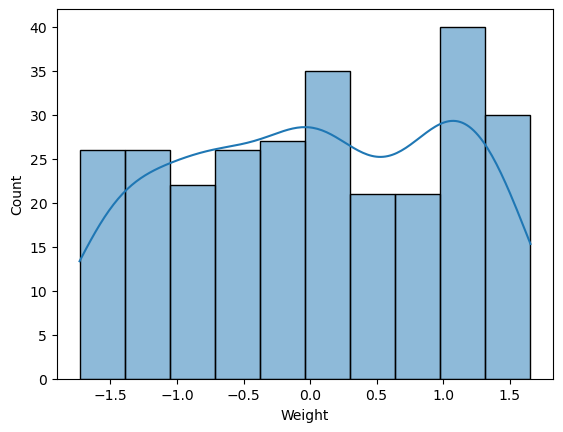

In [48]:
data = x_train['Gender']

# Histogram
sns.histplot(data, kde=True)
plt.show()

data = x_train['Height']

# Histogram
sns.histplot(data, kde=True)
plt.show()

data = x_train['Weight']

# Histogram
sns.histplot(data, kde=True)
plt.show()

## Training the Data

In [239]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(5e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(5e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(5e-4))
    ]) 
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

In [240]:
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)               │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,638 (6.40 KB)

 Trainable params: 1,510 (5.90 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Can be changed to 'val_accuracy' if focusing on accuracy
    patience=5, 
    restore_best_weights=True
)

history = model.fit(
    x_train_augmented, y_train_augmented,
    validation_data=(x_valid, y_valid),
    epochs=100,
    callbacks=[early_stopping],
    batch_size=32,
    verbose=2
)

Epoch 1/1000
9/9 - 3s - 328ms/step - accuracy: 0.1971 - loss: 2.4883 - val_accuracy: 0.1525 - val_loss: 1.8574
Epoch 2/1000
9/9 - 0s - 5ms/step - accuracy: 0.2409 - loss: 2.2775 - val_accuracy: 0.1525 - val_loss: 1.8084
Epoch 3/1000
9/9 - 0s - 7ms/step - accuracy: 0.3175 - loss: 2.0069 - val_accuracy: 0.2881 - val_loss: 1.7603
Epoch 4/1000
9/9 - 0s - 5ms/step - accuracy: 0.3248 - loss: 1.8073 - val_accuracy: 0.3220 - val_loss: 1.7173
Epoch 5/1000
9/9 - 0s - 5ms/step - accuracy: 0.3577 - loss: 1.9141 - val_accuracy: 0.4237 - val_loss: 1.6731
Epoch 6/1000
9/9 - 0s - 5ms/step - accuracy: 0.3796 - loss: 1.7182 - val_accuracy: 0.5593 - val_loss: 1.6284
Epoch 7/1000
9/9 - 0s - 5ms/step - accuracy: 0.4562 - loss: 1.5635 - val_accuracy: 0.5424 - val_loss: 1.5849
Epoch 8/1000
9/9 - 0s - 5ms/step - accuracy: 0.4562 - loss: 1.5357 - val_accuracy: 0.5085 - val_loss: 1.5428
Epoch 9/1000
9/9 - 0s - 5ms/step - accuracy: 0.4708 - loss: 1.4456 - val_accuracy: 0.5085 - val_loss: 1.4990
Epoch 10/1000
9/9

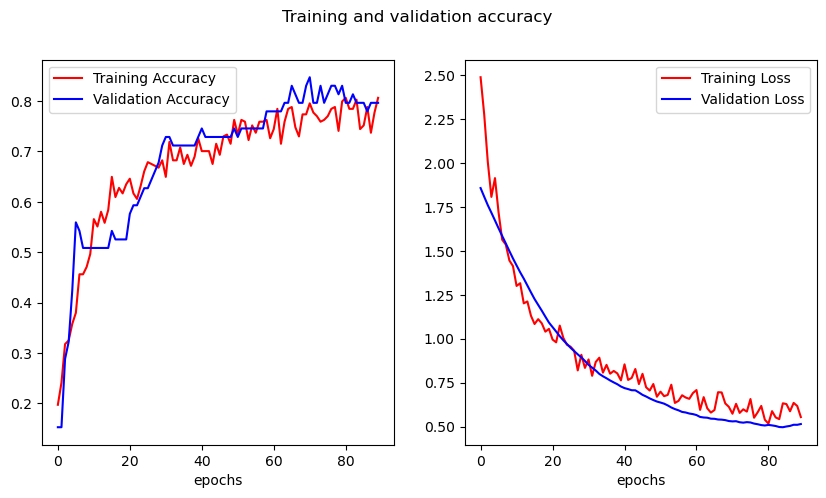

In [242]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [243]:
# Predict the model
y_pred = model.predict(x_test)

y_pred_class = np.argmax(y_pred, axis=1)

accuracy = np.mean(y_test == y_pred_class)

# Print out the accuracy that based on comparing the y_test and the predicted labelx
print(f'Accuracy: {accuracy*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Accuracy: 86.44%
